# § Chapter13 Introduction to Modeling Libraries 

## §13.1 Interfacing Between pandas and Model Code

## §13.2 Creating Model Descriptions with Patsy
-	Data Transformations in Patsy Formulas
-	Categorical Data and Patsy

## §13.3 Introduction to statsmodels
-	Estimating Linear Models
-	Estimating Time Series Processes

## §13.4 Introduction to scikit-learn

In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows #display max raw in dataframe
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True) #precision:控制打印精度(小數位數), suppress 是否要改以科學記號顯示
plt.rcParams['axes.unicode_minus']=False # 用來正常顯示負號
NUMEXPR_MAX_THREADS = 8

## §13.1 Interfacing Between pandas and Model Code

In [2]:
import pandas as pd
import numpy as np
data = pd.DataFrame({
    'x0': [1, 2, 3, 4, 5],
    'x1': [0.01, -0.01, 0.25, -4.1, 0.],
    'y': [-1.5, 0., 3.6, 1.3, -2.]})
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [3]:
data.columns

Index(['x0', 'x1', 'y'], dtype='object')

In [4]:
# transform pd.dataframe to np.array
data.values

array([[ 1.  ,  0.01, -1.5 ],
       [ 2.  , -0.01,  0.  ],
       [ 3.  ,  0.25,  3.6 ],
       [ 4.  , -4.1 ,  1.3 ],
       [ 5.  ,  0.  , -2.  ]])

In [5]:
# transform np.array to pd.dataframe
df2 = pd.DataFrame(data.values, columns=['one', 'two', 'three'])
df2

,one,two,three
0,1.0,0.01,-1.5
1,2.0,-0.01,0.0
2,3.0,0.25,3.6
3,4.0,-4.10,1.3
4,5.0,0.00,-2.0


In [6]:
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


$$
y = X \beta
$$

Solution to the least square:
$$
\hat \beta = (X^T X)^{-1} X^T y
$$

In [8]:
model_cols = ['x0', 'x1']
data.loc[:, model_cols].values

array([[ 1.  ,  0.01],
       [ 2.  , -0.01],
       [ 3.  ,  0.25],
       [ 4.  , -4.1 ],
       [ 5.  ,  0.  ]])

In [9]:
data['category'] = pd.Categorical(['a', 'b', 'a', 'a', 'b'],
                                  categories=['a', 'b'])
data

,x0,x1,y,category
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,a
3,4,-4.10,1.3,a
4,5,0.00,-2.0,b


In [10]:
data.category

0    a
1    b
2    a
3    a
4    b
Name: category, dtype: category
Categories (2, object): ['a', 'b']

In [11]:
# get_dummies => Convert categorical variable into dummy/indicator variables.
dummies = pd.get_dummies(data.category, prefix='category')
dummies

,category_a,category_b
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [12]:
data_with_dummies = data.drop('category', axis=1).join(dummies)
data_with_dummies

,x0,x1,y,category_a,category_b
0,1,0.01,-1.5,1,0
1,2,-0.01,0.0,0,1
2,3,0.25,3.6,1,0
3,4,-4.10,1.3,1,0
4,5,0.00,-2.0,0,1


## §13.2 Creating Model Descriptions with Patsy
-	Data Transformations in Patsy Formulas
-	Categorical Data and Patsy

## Linear regression basics and implementation in Python
https://www.reneshbedre.com/blog/linear-regression.html

```python
y ~ x0 + x1
```

linear regresson problems:
$$
y = \alpha + \beta_0 x_0 + \beta_1 x_1 
$$
- y: outcome
- $x_0$, $x_1$: predictors

In [13]:
data = pd.DataFrame({
    'x0': [1, 2, 3, 4, 5],
    'x1': [0.01, -0.01, 0.25, -4.1, 0.],
    'y': [-1.5, 0., 3.6, 1.3, -2.]})
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [14]:
import patsy
y, X = patsy.dmatrices('y ~ x0 + x1', data) # design matrix

In [15]:
y

DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.0
  Terms:
    'y' (column 0)

In [16]:
# "Intercept" will auto gernate by patsy， 
# This is a convention for linear models like ordinary least squares (OLS) regression
X

DesignMatrix with shape (5, 3)
  Intercept  x0     x1
          1   1   0.01
          1   2  -0.01
          1   3   0.25
          1   4  -4.10
          1   5   0.00
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'x1' (column 2)

In [17]:
np.asarray(y)

array([[-1.5],
       [ 0. ],
       [ 3.6],
       [ 1.3],
       [-2. ]])

In [18]:
np.asarray(X)

array([[ 1.  ,  1.  ,  0.01],
       [ 1.  ,  2.  , -0.01],
       [ 1.  ,  3.  ,  0.25],
       [ 1.  ,  4.  , -4.1 ],
       [ 1.  ,  5.  ,  0.  ]])

linear regresson problems:
$$
y = \beta_0 x_0 + \beta_1 x_1 
$$
- y: outcome
- $x_0$, $x_1$: predictors

In [19]:
# We can suppress the "intercept" by adding + 0 to the model
patsy.dmatrices('y ~ x0 + x1 + 0', data)[1]

DesignMatrix with shape (5, 2)
  x0     x1
   1   0.01
   2  -0.01
   3   0.25
   4  -4.10
   5   0.00
  Terms:
    'x0' (column 0)
    'x1' (column 1)

In [20]:
X

DesignMatrix with shape (5, 3)
  Intercept  x0     x1
          1   1   0.01
          1   2  -0.01
          1   3   0.25
          1   4  -4.10
          1   5   0.00
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'x1' (column 2)

In [21]:
type(X)

patsy.design_info.DesignMatrix

$$
y = X \beta
$$

Solution to the least square:
$$
\hat \beta = (X^T X)^{-1} X^T y
$$

linear regresson problems:
$$
y = \alpha + \beta_0 x_0 + \beta_1 x_1 
$$
- y: outcome
- $x_0$, $x_1$: predictors

In [22]:
# lstsq =>　least squares method　最小平方法
coef, resid, _, _ = np.linalg.lstsq(X, y) # coef => 解 , resid => 殘差平方和
coef

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([[ 0.3129],
       [-0.0791],
       [-0.2655]])

In [24]:
# np.linalg.lstsq?

In [25]:
coef = pd.Series(coef.squeeze(), index=X.design_info.column_names) # Remove axes of length one from array.
coef

Intercept    0.312910
x0          -0.079106
x1          -0.265464
dtype: float64

### §13.2.1 Data Transformations in Patsy Formulas

https://www.youtube.com/playlist?list=PLgJhDSE2ZLxblV7ywtiK3xrEZ-vWm11Xn

## patsy - Describing statistical models in Python
https://patsy.readthedocs.io/en/latest/

In [26]:
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [27]:
y, X = patsy.dmatrices('y ~ x0 + np.log(np.abs(x1) + 1)', data)
X

DesignMatrix with shape (5, 3)
  Intercept  x0  np.log(np.abs(x1) + 1)
          1   1                 0.00995
          1   2                 0.00995
          1   3                 0.22314
          1   4                 1.62924
          1   5                 0.00000
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'np.log(np.abs(x1) + 1)' (column 2)

In [28]:
data['x1'].mean()

-0.7699999999999999

In [29]:
# standardizing => (to mean 0 and variance 1) , center => (subtracting the mean)
y, X = patsy.dmatrices('y ~ standardize(x0) + center(x1)', data)
X

DesignMatrix with shape (5, 3)
  Intercept  standardize(x0)  center(x1)
          1         -1.41421        0.78
          1         -0.70711        0.76
          1          0.00000        1.02
          1          0.70711       -3.33
          1          1.41421        0.77
  Terms:
    'Intercept' (column 0)
    'standardize(x0)' (column 1)
    'center(x1)' (column 2)

In [30]:
X.design_info

DesignInfo(['Intercept', 'standardize(x0)', 'center(x1)'],
           factor_infos={EvalFactor('standardize(x0)'): FactorInfo(factor=EvalFactor('standardize(x0)'),
                                    type='numerical',
                                    state=<factor state>,
                                    num_columns=1),
                         EvalFactor('center(x1)'): FactorInfo(factor=EvalFactor('center(x1)'),
                                    type='numerical',
                                    state=<factor state>,
                                    num_columns=1)},
           term_codings=OrderedDict([(Term([]),
                                      [SubtermInfo(factors=(),
                                                   contrast_matrices={},
                                                   num_columns=1)]),
                                     (Term([EvalFactor('standardize(x0)')]),
                                      [SubtermInfo(factors=(EvalFactor('standardiz

In [31]:
type(X.design_info)

patsy.design_info.DesignInfo

In [32]:
# type([X.design_info])

In [33]:
#patsy.build_design_matrices => apply transformations to new outof-sample data using the saved information 
                                                                     # from the original in-sample dataset

new_data = pd.DataFrame({ 
    'x0': [6, 7, 8, 9],
    'x1': [3.1, -0.5, 0, 2.3],
    'y': [1, 2, 3, 4]})
new_X = patsy.build_design_matrices([X.design_info], new_data)
new_X

[DesignMatrix with shape (4, 3)
   Intercept  standardize(x0)  center(x1)
           1          2.12132        3.87
           1          2.82843        0.27
           1          3.53553        0.77
           1          4.24264        3.07
   Terms:
     'Intercept' (column 0)
     'standardize(x0)' (column 1)
     'center(x1)' (column 2)]

In [34]:
# patsy.build_design_matrices?

In [35]:
new_data['x1'] - data['x1'].mean()

0    3.87
1    0.27
2    0.77
3    3.07
Name: x1, dtype: float64

linear regresson problems:
$$
y = \alpha + \beta_0 (x_0 + x_1) 
$$
- y: outcome
- $x_0 + x_1$: predictors

In [36]:
# I => addition
y, X = patsy.dmatrices('y ~ I(x0 + x1)', data)
X

DesignMatrix with shape (5, 2)
  Intercept  I(x0 + x1)
          1        1.01
          1        1.99
          1        3.25
          1       -0.10
          1        5.00
  Terms:
    'Intercept' (column 0)
    'I(x0 + x1)' (column 1)

### §13.2.2 Categorical Data and Patsy

## Regression with Categorical Variables: Dummy Coding Essentials in R
http://www.sthda.com/english/articles/40-regression-analysis/163-regression-with-categorical-variables-dummy-coding-essentials-in-r/

In [37]:
data = pd.DataFrame({
    'key1': ['a', 'a', 'b', 'b', 'a', 'b', 'a', 'b'],
    'key2': [0, 1, 0, 1, 0, 1, 0, 0],
    'v1': [1, 2, 3, 4, 5, 6, 7, 8],
    'v2': [-1, 0, 2.5, -0.5, 4.0, -1.2, 0.2, -1.7]
})
data

,key1,key2,v1,v2
0,a,0,1,-1.0
1,a,1,2,0.0
2,b,0,3,2.5
3,b,1,4,-0.5
4,a,0,5,4.0
5,b,1,6,-1.2
6,a,0,7,0.2
7,b,0,8,-1.7


linear regresson problems:
$$
v_2 = \alpha + \beta_0 Indicator(key1 == b) 
$$
- y: outcome
- $key1$: predictors, default = 'b'

In [39]:
# by default non-numeric terms will be converted to dummy variables 
y, X = patsy.dmatrices('v2 ~ key1', data)
X

DesignMatrix with shape (8, 2)
  Intercept  key1[T.b]
          1          0
          1          0
          1          1
          1          1
          1          0
          1          1
          1          0
          1          1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)

In [40]:
y, X = patsy.dmatrices('v2 ~ key1 + 0', data)
X

DesignMatrix with shape (8, 2)
  key1[a]  key1[b]
        1        0
        1        0
        0        1
        0        1
        1        0
        0        1
        1        0
        0        1
  Terms:
    'key1' (columns 0:2)

In [41]:
y, X = patsy.dmatrices('v2 ~ key2 + 0', data)
X

DesignMatrix with shape (8, 1)
  key2
     0
     1
     0
     1
     0
     1
     0
     0
  Terms:
    'key2' (column 0)

In [42]:
# C => change to categorical
y, X = patsy.dmatrices('v2 ~ C(key2) + 0', data)
X

DesignMatrix with shape (8, 2)
  C(key2)[0]  C(key2)[1]
           1           0
           0           1
           1           0
           0           1
           1           0
           0           1
           1           0
           1           0
  Terms:
    'C(key2)' (columns 0:2)

In [43]:
data['key2'] = data['key2'].map({0: 'zero', 1: 'one'})
data

,key1,key2,v1,v2
0,a,zero,1,-1.0
1,a,one,2,0.0
2,b,zero,3,2.5
3,b,one,4,-0.5
4,a,zero,5,4.0
5,b,one,6,-1.2
6,a,zero,7,0.2
7,b,zero,8,-1.7


In [44]:
y, X = patsy.dmatrices('v2 ~ key2', data)
X

DesignMatrix with shape (8, 2)
  Intercept  key2[T.zero]
          1             1
          1             0
          1             1
          1             0
          1             1
          1             0
          1             1
          1             1
  Terms:
    'Intercept' (column 0)
    'key2' (column 1)

In [45]:
y, X = patsy.dmatrices('v2 ~ key1 + key2', data)
X

DesignMatrix with shape (8, 3)
  Intercept  key1[T.b]  key2[T.zero]
          1          0             1
          1          0             0
          1          1             1
          1          1             0
          1          0             1
          1          1             0
          1          0             1
          1          1             1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)
    'key2' (column 2)

linear regresson problems:
$$
v_2 = \alpha + \beta_0 I(key1 == b) + \beta_1 I(key2 == zero) + \beta_2 I(key1 == b \wedge key2 == zero) 
$$
- y: outcome
- $key1$，$key2$: predictors

In [46]:
# ":" = >Interactions 交集
y, X = patsy.dmatrices('v2 ~ key1 + key2 + key1:key2', data)
X

DesignMatrix with shape (8, 4)
  Intercept  key1[T.b]  key2[T.zero]  key1[T.b]:key2[T.zero]
          1          0             1                       0
          1          0             0                       0
          1          1             1                       1
          1          1             0                       0
          1          0             1                       0
          1          1             0                       0
          1          0             1                       0
          1          1             1                       1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)
    'key2' (column 2)
    'key1:key2' (column 3)

## §13.3 Introduction to statsmodels
-	Estimating Linear Models
-	Estimating Time Series Processes

### §13.3.1 Estimating Linear Models

### Introduction to statsmodels
https://www.youtube.com/watch?v=2BdfjqyWj3c
https://www.youtube.com/watch?v=2DZGeKjEZgk

In [47]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

$$
y = \alpha + \beta_0 x_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon 
$$
- y: outcome
- $x_0, ~x_1, ~x_2$: predictors

In [48]:
def dnorm(mean, variance, size=1):
    if isinstance(size, int):
        size = size,
    return mean + np.sqrt(variance) * np.random.randn(*size)

# For reproducibility
np.random.seed(12345)

N = 100
X = np.c_[dnorm(0, 0.4, size=N),
          dnorm(0, 0.6, size=N),
          dnorm(0, 0.2, size=N)]
eps = dnorm(0, 0.1, size=N)
beta = [0.1, 0.3, 0.5]

y = np.dot(X, beta) + eps

In [49]:
X[:5]

array([[-0.1295, -1.2128,  0.5042],
       [ 0.3029, -0.4357, -0.2542],
       [-0.3285, -0.0253,  0.1384],
       [-0.3515, -0.7196, -0.2582],
       [ 1.2433, -0.3738, -0.5226]])

In [50]:
y[:5]

array([ 0.4279, -0.6735, -0.0909, -0.4895, -0.1289])

In [54]:
X_model = sm.add_constant(X)
X_model[:5]

array([[ 1.    , -0.1295, -1.2128,  0.5042],
       [ 1.    ,  0.3029, -0.4357, -0.2542],
       [ 1.    , -0.3285, -0.0253,  0.1384],
       [ 1.    , -0.3515, -0.7196, -0.2582],
       [ 1.    ,  1.2433, -0.3738, -0.5226]])

In [51]:
# sm.OLS => ordinary least squares linear regression
model = sm.OLS(y, X)

In [52]:
results = model.fit()
results.params

array([0.1783, 0.223 , 0.501 ])

In [53]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.430
Model:                            OLS   Adj. R-squared (uncentered):              0.413
Method:                 Least Squares   F-statistic:                              24.42
Date:                Mon, 27 Dec 2021   Prob (F-statistic):                    7.44e-12
Time:                        11:12:01   Log-Likelihood:                         -34.305
No. Observations:                 100   AIC:                                      74.61
Df Residuals:                      97   BIC:                                      82.42
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [55]:
X_model = sm.add_constant(X)
X_model[:5]

array([[ 1.    , -0.1295, -1.2128,  0.5042],
       [ 1.    ,  0.3029, -0.4357, -0.2542],
       [ 1.    , -0.3285, -0.0253,  0.1384],
       [ 1.    , -0.3515, -0.7196, -0.2582],
       [ 1.    ,  1.2433, -0.3738, -0.5226]])

In [56]:
# sm.OLS => ordinary least squares linear regression
model_2 = sm.OLS(y, X_model)

In [57]:
results_2 = model_2.fit()
results_2.params

array([0.0336, 0.1761, 0.2248, 0.5148])

In [58]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     24.68
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           6.37e-12
Time:                        11:14:28   Log-Likelihood:                -33.835
No. Observations:                 100   AIC:                             75.67
Df Residuals:                      96   BIC:                             86.09
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0336      0.035      0.952      0.3

In [ ]:
# statsmodels with DataFrame

In [59]:
data = pd.DataFrame(X, columns=['col0', 'col1', 'col2'])
data['y'] = y
data[:5]

,col0,col1,col2,y
0,-0.129468,-1.212753,0.504225,0.427863
1,0.302910,-0.435742,-0.254180,-0.673480
2,-0.328522,-0.025302,0.138351,-0.090878
3,-0.351475,-0.719605,-0.258215,-0.489494
4,1.243269,-0.373799,-0.522629,-0.128941


In [60]:
# ols => ordinary least squares linear regression
results = smf.ols('y ~ col0 + col1 + col2', data=data).fit()
results.params

Intercept    0.033559
col0         0.176149
col1         0.224826
col2         0.514808
dtype: float64

In [61]:
# wiki: t統計量(t values)是參數的估計值與其假設值的偏差與其標準誤差的比率
results.tvalues

Intercept    0.952188
col0         3.319754
col1         4.850730
col2         6.303971
dtype: float64

In [62]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     24.68
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           6.37e-12
Time:                        11:17:48   Log-Likelihood:                -33.835
No. Observations:                 100   AIC:                             75.67
Df Residuals:                      96   BIC:                             86.09
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0336      0.035      0.952      0.343      -0.036       0.104
col0           0.1761      0.053      3.320      0.001       0.071       0.281
col1           0.2248      0.046      4.851      0.000       0.133       0.317
col2           0.5148      0.082      6.304      0.000       0.353       0.677
==============================================================================
Omnibus:                        4.504   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                3.957
Skew:                           0.475   Prob(JB):                        0.138
Kurtosis:                       3.222   Cond. No.                         2.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
results.predict(data[:5])

0   -0.002327
1   -0.141904
2    0.041226
3   -0.323070
4   -0.100535
dtype: float64

In [64]:
y[:5]

array([ 0.4279, -0.6735, -0.0909, -0.4895, -0.1289])

### §13.3.2 Estimating Time Series Processes

![Decomposition of Time Series Compones](0_JWWglnH4RBR-SbxC.png)

## ARIMA Model Python Example — Time Series Forecasting
https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7

## Python Tutorial: Intro to AR, MA and ARMA models
https://www.youtube.com/watch?v=kaXKnjCvEUQ

## What are Autoregressive Models
https://www.youtube.com/watch?v=Mc6sBAUdDP4

$$
y_t = \beta_0 y_{t-1} + \beta_1 y_{t-2} + \epsilon
$$

In [66]:
init_x = 4

import random
values = [init_x, init_x]
N = 1000

b0 = 0.8
b1 = -0.4
noise = dnorm(0, 0.1, N)
for i in range(N):
    new_x = values[-1] * b0 + values[-2] * b1 + noise[i]
    values.append(new_x)

In [67]:
values

[4,
 4,
 2.247499398428837,
 0.33925567686576186,
 -0.6982899195727197,
 -0.6649772769986597,
 -0.02622288463652772,
 0.4528368297311267,
 0.35165101753789774,
 0.3653870604658267,
 0.11452782892434163,
 -0.2182735679300477,
 -0.257332427686747,
 0.637115500240848,
 0.3177576771007221,
 -0.07316073157575237,
 -0.546235710271989,
 -0.26860947762231896,
 -0.2568883084628301,
 -0.2627993852404232,
 0.003284686308583598,
 0.17238298420925535,
 0.17879163181188185,
 0.1777726535067772,
 0.09351829739614173,
 0.04534569617395381,
 -0.41142339938961875,
 -0.031761739515050236,
 0.4145801052077581,
 0.03090708728007946,
 -0.09313503321273792,
 0.3135213521490004,
 0.22404489314408313,
 0.06986568055082881,
 0.16861905558510937,
 0.2959248623367012,
 -0.08281906482426549,
 -0.035087636172165454,
 0.1702410197442458,
 -0.02254263230459652,
 -0.31809522844479,
 0.16650220324197954,
 0.26745965718563014,
 0.26256458984591285,
 -0.1887593783412993,
 -0.1571628963914821,
 -0.4070886438198967,
 -0.36

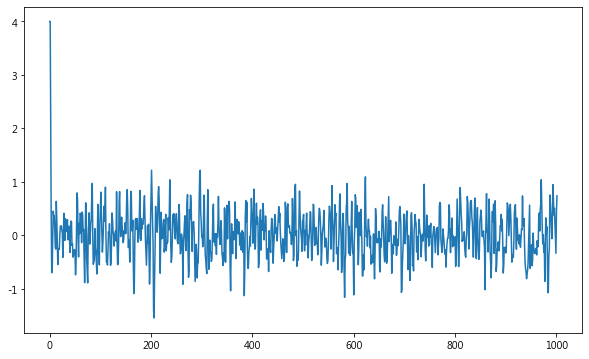

In [68]:
from matplotlib import pyplot as plt
plt.plot(values)
# plt.show()

In [69]:
# expected error due to replacement in newer version
MAXLAGS = 5
model = sm.tsa.AR(values)
results = model.fit(MAXLAGS)

C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [70]:
# Instead, this is the fix
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(values, lags = MAXLAGS).fit()

C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [71]:
AutoReg?

## 最優模型選擇準則：AIC和BIC
https://www.itread01.com/ielqf.html
有一個指標，講的是，雖然用的階數愈多，
擬合效果愈好，但有可能會過擬合，
而且用太多的參數也浪費，
那有沒有不要用太多階的參數，而且效果不錯？

In [72]:
model.params

array([ 0.0079,  0.7107, -0.3169, -0.0672,  0.0041, -0.0008])

In [73]:
# 待會 print() 輸出的格式
out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'

In [74]:
print(out.format(model.aic, model.hqic, model.bic))

AIC: -2.278, HQIC: -2.265, BIC: -2.243


In [75]:
# 要是我們「作弊」，假設先知道 lags =2 的話，那…
res = AutoReg(values, lags = 2).fit()
print(out.format(res.aic, res.hqic, res.bic))

AIC: -2.277, HQIC: -2.270, BIC: -2.257


In [76]:
res.params

array([ 0.0078,  0.7468, -0.3562])

In [77]:
# another bad estimate, assuming lag of 2 with a season of period 11
res = AutoReg(values, lags=1, seasonal=True, period=11).fit()
print(out.format(res.aic, res.hqic, res.bic))

AIC: -2.095, HQIC: -2.070, BIC: -2.031


## §13.4 Introduction to scikit-learn

## StatQuest: Logistic Regression
https://www.youtube.com/watch?v=yIYKR4sgzI8

### Sigmoid function
![hmfile_hash_38a8acae.png](hmfile_hash_38a8acae.png)

## Logistic Regression in Python
https://vinesmsuic.github.io/2020/07/09/datascience4/#accuracy

## A Comprehensive Guide to Logistic Regression
https://medium.com/analytics-vidhya/a-comprehensive-guide-to-logistic-regression-e0cf04fe738c

## Intro to Machine Learning with Python 4: Train a Logistic Regression Model
https://www.youtube.com/watch?v=f3kSEebz8QA

In [79]:
train = pd.read_csv('datasets/titanic/train.csv')
test = pd.read_csv('datasets/titanic/test.csv')
train[:6]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [80]:
test[:6]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [84]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [83]:
# use the median age of the training dataset to fill the nulls in both tables
# iMpute = 插補
impute_value = train['Age'].median()
train['Age'] = train['Age'].fillna(impute_value)
test['Age'] = test['Age'].fillna(impute_value)

In [ ]:
# impute_value

In [86]:
train['Sex'][:5]

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [87]:
train['IsFemale'] = (train['Sex'] == 'female').astype(int)
test['IsFemale'] = (test['Sex'] == 'female').astype(int)

In [88]:
train['IsFemale'][:5]

0    0
1    1
2    1
3    1
4    0
Name: IsFemale, dtype: int32

In [89]:
predictors = ['Pclass', 'IsFemale', 'Age'] # Pclass => 船票等級
X_train = train[predictors].values
X_test = test[predictors].values
y_train = train['Survived'].values
X_train[:5]

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.],
       [ 1.,  1., 35.],
       [ 3.,  0., 35.]])

In [90]:
X_test

array([[ 3. ,  0. , 34.5],
       [ 3. ,  1. , 47. ],
       [ 2. ,  0. , 62. ],
       ...,
       [ 3. ,  0. , 38.5],
       [ 3. ,  0. , 28. ],
       [ 3. ,  0. , 28. ]])

In [91]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [92]:
model.fit(X_train, y_train)

LogisticRegression()

In [93]:
y_predict = model.predict(X_test)

In [94]:
y_predict[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [95]:
test[:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsFemale
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [96]:
train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsFemale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


如果要知道預測得準不準，就用：
```python
(y_true == y_predict).mean()
```

In [97]:
# 至少我們先看一下 in-sample fit 的效果如何
y_predict = model.predict(X_train)
y_predict[:20]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
      dtype=int64)

In [98]:
y_train[:20]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1],
      dtype=int64)

```python
(y_true == y_predict).mean()
```

In [99]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_predict)

0.21212121212121213

In [101]:
np.sqrt(0.21212121212121213)

0.4605661864718383

In [ ]:
# LogisticRegression?

In [102]:
from sklearn.linear_model import LogisticRegressionCV
model_cv = LogisticRegressionCV(cv = 10)
model_cv.fit(X_train, y_train)

LogisticRegressionCV(cv=10)

In [103]:
LogisticRegressionCV?

### 3.1. Cross-validation: evaluating estimator performance¶
https://scikit-learn.org/stable/modules/cross_validation.html

![cv](grid_search_cross_validation.png)

In [104]:
from sklearn.model_selection import cross_val_score
model = LogisticRegression(C=10) # C => Inverse of regularization strength, smaller values specify stronger regularization.
scores = cross_val_score(model, X_train, y_train, cv=4, scoring='accuracy')
scores

array([0.7758, 0.7982, 0.7758, 0.7883])

In [ ]:
# cross_val_score?

## Continuing Your Education